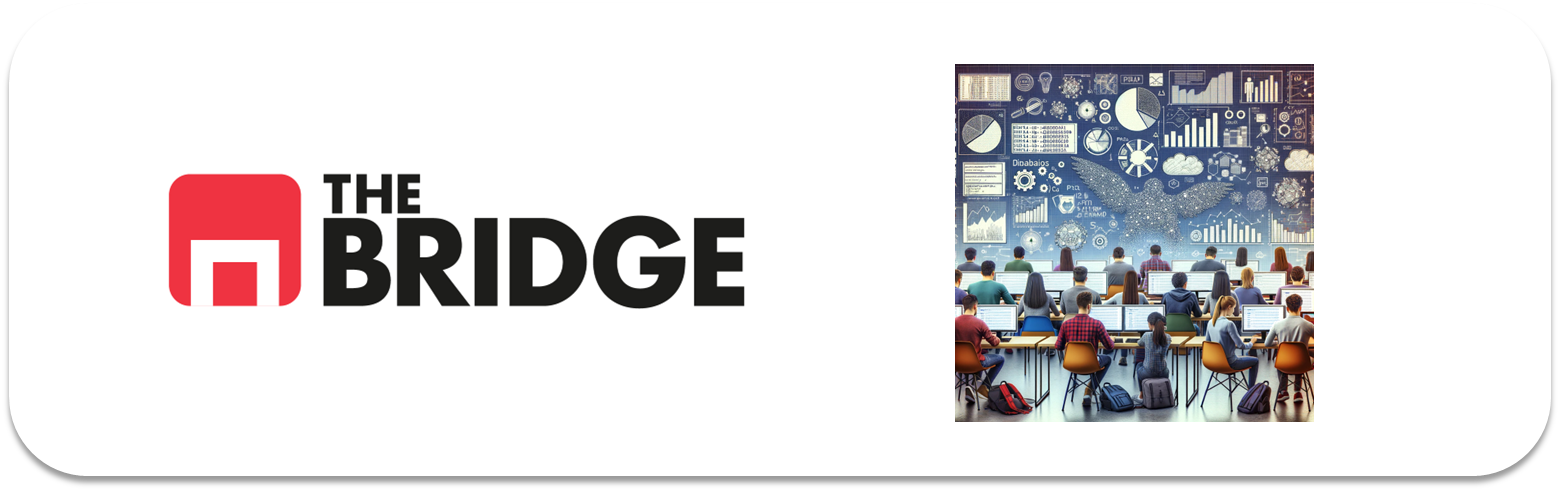

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  


**(TARGET)MEDV:** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [31]:
#Regresion Lineal y Regularizacion
#0 - Importamos nuestras Librerias 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 1 - Cargamos nuestro dataset 

data = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_10\Unidad_01\Practica_Obligatoria\data\hard_to_find\obligatoria_hard.csv")
data
#No podemos separar el data frame por que no esta separao por comas. 


,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...
...,...
501,0.06263|0.0|11.93|0.0|0.573|6.593|69.1|2.4786|...
502,0.04527|0.0|11.93|0.0|0.573|6.12|76.7|2.2875|1...
503,0.06076|0.0|11.93|0.0|0.573|6.976|91.0|2.1675|...
504,0.10959|0.0|11.93|0.0|0.573|6.794|89.3|2.3889|...


In [ ]:
#1 Especificando en el data frame el delimitador si nos corre el data frame ok 
df = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_10\Unidad_01\Practica_Obligatoria\data\hard_to_find\obligatoria_hard.csv", delimiter = "|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [ ]:
# 1.1 - Quick Analysis Dataset (Solo valores numericos aparentemente)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
# 1.2 - Quick Analysis Dataset (Solo Floats sin valores nulos)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.

### Indicaciones Update
Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.✅  
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.✅ 
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.



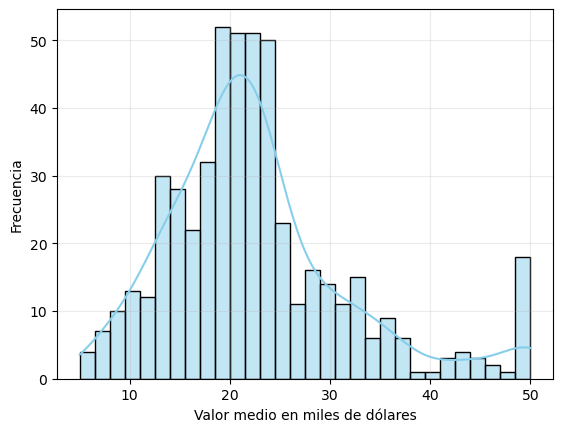

In [36]:
# 2 - Escogemos nuestra variable TARGET
# (**(TARGET)MEDV:** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares)

# 2.1 Analizamos nuestra variable de forma GRAFICA. 


sns.histplot(df["MEDV"], kde=True, bins=30, color = "skyblue")
plt.xlabel("Valor medio en miles de dólares", )
plt.ylabel("Frecuencia")
plt.grid(alpha = 0.25)
plt.show()


In [40]:
# A bote pronto, podemos ver que hay una desviacion hacia la derecha. El grafico se apoya mas por su parte derecha. 
# Indicando que no tiene esa forma gaussiana que buscamos. 
# Ademas vemos tambien algunos outliers o creemos verlo (haremos un boxplot para verlo mas a detalle)
# Sin duda debemos pasar por un proceso de regularizacion



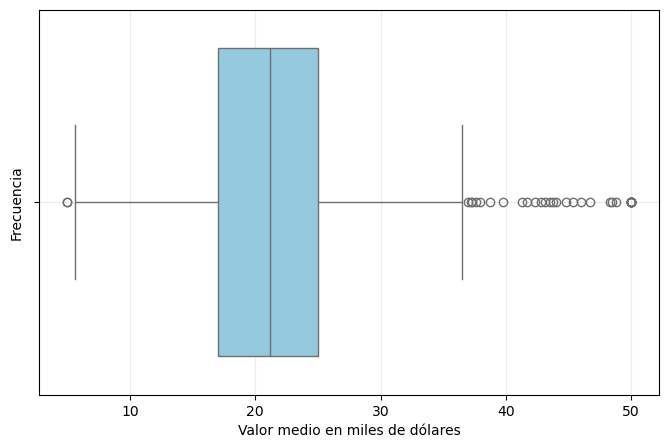

In [41]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df["MEDV"], 
            color = "skyblue")
plt.xlabel("Valor medio en miles de dólares", )
plt.ylabel("Frecuencia")
plt.grid(alpha = 0.25)
plt.show()

#Efectivamente tenemos mas outliers de los esperados. 


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.✅ 
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test


In [45]:
#A pesar de que vemos una forma no gaussiana, indicando una regularizacion seguiremos el paso a paso, crearemos el modelo y lo entrenaremos

# 2. Selección de variables modelo
# ------------------
X = df[["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	"PTRATIO",	"LSTAT"]]
y = df["MEDV"]



In [ ]:
# 3-4. Dividir datos en entrenamiento y prueba Hacemos el SPLIT y contruimos las parejas Y = target (importamos la libreria de sklearn)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.


5. Haremos un Analisis en CORTO de los datos. Ya que no los conocemos y no sabemos que tan importantes son.
Podriamos plantear un heatmap para ver que variables se correlacionan mejor con la variable y un scatter tal vez ayudarian

### Cuales serian las variables para que el modelo funcionara mejor, cuales son las variables mas importantes?, todas tienen el mismo peso?

### QUE VARIABLES HACEN QUE UNA CASA SEA MAS CARA O MAS BARATA EN BOSTON? 

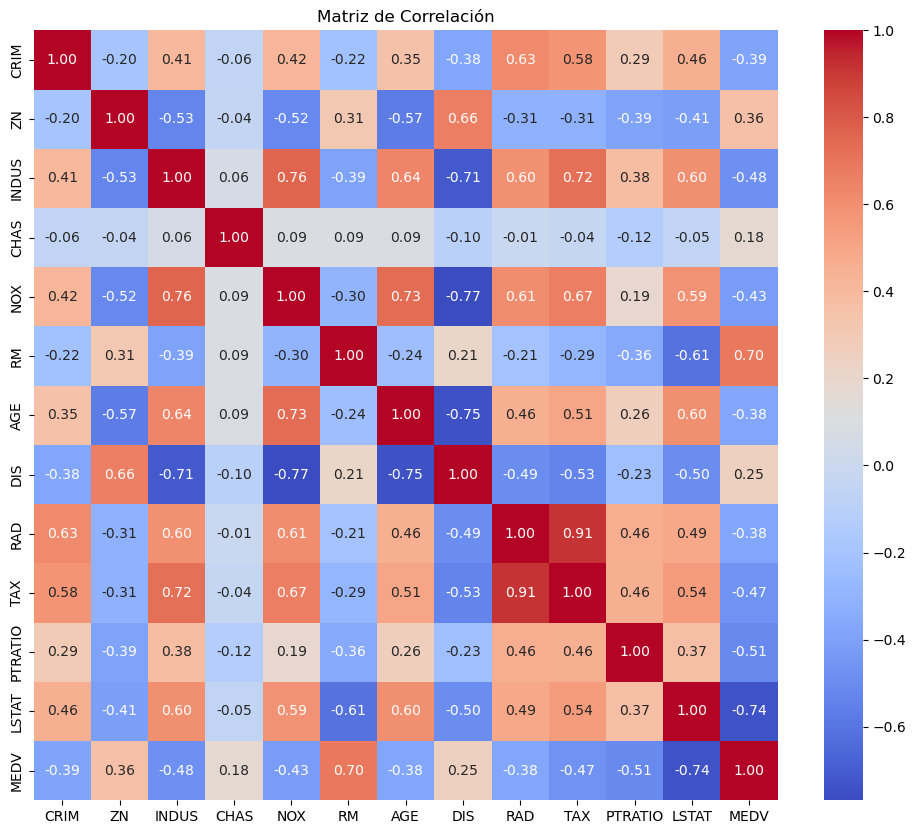

In [56]:
#HeatMap Correlacion

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [65]:
# La variable CHAS tiene muy poca correlacion con MEDV, la variable DIS tambien tiene poca relacion. 
# La variable  PT-Ratio No creo que se influyente sobre el precio de las casas

#
# Mantendremos todas las variables y probaremos el modelo estandarizandolo. Tendriamos que conocer muy bien las variables para entender su impacto 


***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  

In [58]:
7# Contruimos nuestro modelo regresion lineal y lo entrenamos 
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

#Entrenamos el modelo con 
modelo.fit(X_train, y_train)

LinearRegression()

8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

In [59]:
# Analisamos los pesos

# Mostrar coeficientes
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)
print("Intercepto:", modelo.intercept_)


         Coeficiente
CRIM       -0.127196
ZN          0.030795
INDUS       0.025248
CHAS        3.049477
NOX       -18.183246
RM          4.240098
AGE        -0.003594
DIS        -1.465507
RAD         0.239990
TAX        -0.011275
PTRATIO    -0.894845
LSTAT      -0.537770
Intercepto: 36.97046906703014


In [60]:
# POCO PESO
# ZN tiene muuuy poco peso IRRELEVANTE. 
# INDUS tambien tiene muy poco peso
# AGE la antiguedad tiene muy poco peso nuevamente 
# Los Taxes no influyen demasiado muy bajo tambien 

#MUCHO PESO 
#NOX por lejos es la que mas peso tiene -> Contaminacion. Esto no deberia influir tanto pero hay que regularizar si o si 


In [61]:
#sigamos adelante evaluado el modelo

predicciones = modelo.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 22.78
R^2: 0.69


In [63]:
#MSE = 22.78 Tenemos un error de 22.78 x 1000 = unos 22.780 $ de error -> DEMASIADO 
#R2: 0.69 % el modelo explica el 69% de la varaizan en los precios, es un modelo decente pero tendria que afinarse mucho mas

In [69]:
#Debemos Estandarizar para penalizar esos Pesos 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_estandar = scaler.fit_transform(X_train)  # Aprende y transforma entrenamiento
X_test_estandar = scaler.transform(X_test)        # Solo transforma test (no aprende aquí)

In [71]:
#Volvemos a entrenar el modelo  a ver como va despues de estandarizar

modelo_std = LinearRegression()
modelo_std.fit(X_train_estandar, y_train)

predicciones_std = modelo_std.predict(X_test_estandar)

mse_std = mean_squared_error(y_test, predicciones_std)
r2_std = r2_score(y_test, predicciones_std)

print(f"[Estandarizado] MSE: {mse_std:.2f}")
print(f"[Estandarizado] R²: {r2_std:.2f}")

[Estandarizado] MSE: 22.78
[Estandarizado] R²: 0.69


In [ ]:
#Me dan los mismos resultados sin estandarizarlo. Lo mejor en este caso es regularizarlo. 

8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

In [72]:
#REGULARIZAR Y PROBAR DE NUEVO EL MODELO CON AJUSTE Usaremos Ridge que es menos invasivo que lasso 

from sklearn.linear_model import Ridge, Lasso

for alpha in [0.01, 1.0, 10.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_estandar, y_train)
    pred = ridge.predict(X_test_estandar)
    print(f"[Ridge ={alpha}] MSE: {mean_squared_error(y_test, pred):.2f} | R2: {r2_score(y_test, pred):.2f}")

[Ridge =0.01] MSE: 22.78 | R2: 0.69
[Ridge =1.0] MSE: 22.81 | R2: 0.69
[Ridge =10.0] MSE: 23.09 | R2: 0.69


In [ ]:
#En este caso el 0.01 nos da igual que la regression sin regularizar es muy poco el cambio
# El 1.0 apenas se nota el cambio
# con 10.0 Empeoro nuestro modelo 

In [73]:
#Probaremos lasso teniamos variables de las cuales no estabamos seguro y tal vez esa sea lo que nos permita ajustar mejor el modelo 
# copiamos y pegamos solo que usamos lasso 
from sklearn.linear_model import Lasso

for alpha in [0.01, 0.1, 1.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_estandar, y_train)
    pred = lasso.predict(X_test_estandar)
    print(f"[Lasso ={alpha}] MSE: {mean_squared_error(y_test, pred):.2f} | R2: {r2_score(y_test, pred):.2f}")

[Lasso =0.01] MSE: 22.85 | R2: 0.69
[Lasso =0.1] MSE: 24.41 | R2: 0.67
[Lasso =1.0] MSE: 27.35 | R2: 0.63


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_estandar, y_train)

pd.Series(lasso.coef_, index=X.columns).sort_values()

#vemos 2 variables OUT INDUS y AGE

LSTAT     -3.785145
DIS       -2.326771
PTRATIO   -1.852338
NOX       -1.681049
CRIM      -0.830191
TAX       -0.506835
INDUS     -0.000000
AGE       -0.000000
ZN         0.277040
RAD        0.517564
CHAS       0.757061
RM         3.162588
dtype: float64